# ECG Anomaly Detection 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model 

In [2]:
# Download the dataset
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = df.values
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [3]:
df.shape

(4998, 141)

In [4]:
# 0 - abnormal
# 1 - normal
df[140].value_counts()

140
1.0    2919
0.0    2079
Name: count, dtype: int64

In [5]:
x = df.drop(140,axis=1)
y = df[140]


In [6]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
x_norm = norm.fit_transform(x)
x_norm_df = pd.DataFrame(x_norm)
x_norm_df

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,0.565751,0.403325,0.174330,0.139541,0.132887,0.267145,0.391046,0.407650,0.490147,0.606675,...,0.596026,0.691213,0.740816,0.715777,0.685498,0.636101,0.614525,0.619195,0.660354,0.465778
1,0.481247,0.292669,0.108637,0.117948,0.179900,0.301794,0.483556,0.542721,0.576304,0.692721,...,0.653721,0.655837,0.703491,0.714505,0.704886,0.671159,0.644389,0.690859,0.679208,0.345032
2,0.526886,0.425440,0.161455,0.107276,0.157957,0.313732,0.456971,0.461223,0.501778,0.620457,...,0.758226,0.704301,0.686569,0.650536,0.605436,0.521837,0.523069,0.640975,0.658310,0.420208
3,0.617307,0.489682,0.194544,0.143799,0.147247,0.208664,0.268977,0.431713,0.475662,0.525872,...,0.643746,0.629697,0.682206,0.689361,0.720620,0.717773,0.706196,0.725345,0.706704,0.423042
4,0.643792,0.588088,0.352583,0.191373,0.137914,0.219995,0.337955,0.413351,0.430386,0.561036,...,0.712325,0.740932,0.744174,0.750988,0.791226,0.756039,0.702608,0.712587,0.727213,0.556803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.627404,0.639043,0.531436,0.492781,0.365502,0.341724,0.278207,0.269228,0.344256,0.443733,...,0.791245,0.825789,0.924077,0.972081,0.935186,0.843082,0.792113,0.791648,0.728687,0.550963
4994,0.399208,0.400211,0.221657,0.222293,0.247537,0.334599,0.383010,0.444444,0.520597,0.524148,...,0.734990,0.774392,0.895443,0.935641,0.896253,0.819834,0.771712,0.792560,0.714545,0.529099
4995,0.479358,0.457656,0.290622,0.276005,0.293493,0.387617,0.468816,0.551976,0.556795,0.578887,...,0.602546,0.514955,0.438116,0.336021,0.178907,0.114486,0.104745,0.288905,0.375722,0.317459
4996,0.528543,0.492034,0.294195,0.262332,0.192293,0.196437,0.193909,0.264248,0.386036,0.458220,...,0.748613,0.756199,0.872218,0.915153,0.861025,0.774895,0.730652,0.744576,0.682199,0.511115


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x_norm_df,y,test_size=0.2,random_state=10)

In [8]:
y_train_index=y_train.astype(bool)
y_train_index

798      True
4454    False
2713     True
1586     True
56       True
        ...  
1180     True
3441    False
1344     True
4623    False
1289     True
Name: 140, Length: 3998, dtype: bool

In [9]:
x_train_normal=x_train[y_train_index]

In [10]:
x_train_normal

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
798,0.772366,0.794542,0.538678,0.388540,0.181295,0.148014,0.220125,0.381329,0.377380,0.471902,...,0.582065,0.637358,0.748955,0.752439,0.836035,0.872947,0.903849,0.873657,0.718162,0.613503
2713,0.449272,0.355297,0.202263,0.175475,0.122748,0.156911,0.289202,0.420920,0.446584,0.548432,...,0.594837,0.706514,0.887115,0.923525,0.911261,0.867670,0.734620,0.555066,0.448836,0.335571
1586,0.438358,0.300286,0.129315,0.099873,0.203764,0.395420,0.440895,0.440509,0.579101,0.608381,...,0.658611,0.734193,0.765610,0.730493,0.684971,0.613720,0.586714,0.642032,0.655906,0.322904
56,0.512765,0.397184,0.113205,0.126673,0.250535,0.440459,0.484905,0.470201,0.567188,0.645061,...,0.721278,0.725921,0.751464,0.758440,0.739742,0.715007,0.703328,0.737936,0.749823,0.510693
567,0.545947,0.465088,0.162481,0.072494,0.130951,0.294427,0.410800,0.457544,0.486130,0.627964,...,0.737826,0.788294,0.854497,0.893658,0.906393,0.795209,0.675447,0.644375,0.634767,0.435578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,0.695499,0.714733,0.479432,0.368199,0.239144,0.215778,0.294523,0.394394,0.409715,0.510316,...,0.568081,0.603659,0.720934,0.734722,0.799187,0.833153,0.844508,0.826729,0.686029,0.563869
2009,0.486745,0.453317,0.270413,0.238695,0.280964,0.388323,0.421073,0.412110,0.436924,0.497234,...,0.743229,0.774133,0.805973,0.831664,0.848791,0.804254,0.761356,0.741615,0.702947,0.522962
1180,0.480519,0.407733,0.210554,0.195372,0.204293,0.312470,0.403582,0.450322,0.475597,0.547154,...,0.700156,0.802741,0.853476,0.822051,0.755117,0.634976,0.529545,0.500455,0.511814,0.392496
1344,0.763489,0.703698,0.439155,0.302612,0.139970,0.161917,0.281661,0.416207,0.411069,0.564628,...,0.517340,0.603818,0.743511,0.749588,0.824237,0.882334,0.860215,0.748241,0.573032,0.472202


In [11]:
x_train_abnormal=x_train[~y_train_index]
x_train_abnormal

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
4454,0.586166,0.578910,0.437501,0.446293,0.407743,0.417781,0.352343,0.299172,0.316921,0.412244,...,0.345448,0.276864,0.222137,0.125171,0.091197,0.165777,0.238108,0.419822,0.474857,0.454763
4248,0.453051,0.486626,0.414635,0.382651,0.333176,0.324960,0.245259,0.246376,0.294945,0.371904,...,0.442348,0.390256,0.361154,0.278638,0.234222,0.279467,0.329541,0.477830,0.527245,0.488322
3376,0.490222,0.489317,0.402197,0.408444,0.405008,0.451328,0.389437,0.376129,0.377059,0.408111,...,0.297935,0.245406,0.194345,0.126721,0.133563,0.214260,0.299962,0.448797,0.441865,0.453415
4419,0.424304,0.438414,0.358482,0.373381,0.381619,0.402386,0.350991,0.376968,0.441556,0.511501,...,0.218305,0.137276,0.110820,0.110308,0.213135,0.352020,0.434481,0.558802,0.509957,0.445420
4262,0.599896,0.626227,0.635002,0.601533,0.529341,0.472763,0.316642,0.251548,0.215463,0.275010,...,0.129076,0.099965,0.129608,0.161930,0.318679,0.442963,0.538488,0.662064,0.528112,0.535756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,0.556773,0.529242,0.383458,0.389278,0.378174,0.375453,0.311066,0.270935,0.341237,0.436540,...,0.579093,0.504686,0.454443,0.327624,0.215827,0.180995,0.099808,0.268548,0.323211,0.386463
4136,0.620825,0.604218,0.445254,0.385644,0.305578,0.276805,0.235236,0.214047,0.263031,0.394654,...,0.586888,0.525858,0.477355,0.400935,0.312077,0.271634,0.184171,0.314174,0.359364,0.408288
4829,0.717928,0.797198,0.733919,0.670939,0.563386,0.512010,0.393079,0.381065,0.464431,0.548923,...,0.333265,0.329073,0.343427,0.275791,0.206746,0.214306,0.122991,0.109210,0.227818,0.307974
3441,0.580007,0.571192,0.454679,0.397338,0.367236,0.369400,0.322541,0.289238,0.294099,0.356176,...,0.385292,0.316271,0.258575,0.138817,0.106188,0.210262,0.252527,0.441612,0.427693,0.452869


In [12]:
x_train_normal

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
798,0.772366,0.794542,0.538678,0.388540,0.181295,0.148014,0.220125,0.381329,0.377380,0.471902,...,0.582065,0.637358,0.748955,0.752439,0.836035,0.872947,0.903849,0.873657,0.718162,0.613503
2713,0.449272,0.355297,0.202263,0.175475,0.122748,0.156911,0.289202,0.420920,0.446584,0.548432,...,0.594837,0.706514,0.887115,0.923525,0.911261,0.867670,0.734620,0.555066,0.448836,0.335571
1586,0.438358,0.300286,0.129315,0.099873,0.203764,0.395420,0.440895,0.440509,0.579101,0.608381,...,0.658611,0.734193,0.765610,0.730493,0.684971,0.613720,0.586714,0.642032,0.655906,0.322904
56,0.512765,0.397184,0.113205,0.126673,0.250535,0.440459,0.484905,0.470201,0.567188,0.645061,...,0.721278,0.725921,0.751464,0.758440,0.739742,0.715007,0.703328,0.737936,0.749823,0.510693
567,0.545947,0.465088,0.162481,0.072494,0.130951,0.294427,0.410800,0.457544,0.486130,0.627964,...,0.737826,0.788294,0.854497,0.893658,0.906393,0.795209,0.675447,0.644375,0.634767,0.435578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,0.695499,0.714733,0.479432,0.368199,0.239144,0.215778,0.294523,0.394394,0.409715,0.510316,...,0.568081,0.603659,0.720934,0.734722,0.799187,0.833153,0.844508,0.826729,0.686029,0.563869
2009,0.486745,0.453317,0.270413,0.238695,0.280964,0.388323,0.421073,0.412110,0.436924,0.497234,...,0.743229,0.774133,0.805973,0.831664,0.848791,0.804254,0.761356,0.741615,0.702947,0.522962
1180,0.480519,0.407733,0.210554,0.195372,0.204293,0.312470,0.403582,0.450322,0.475597,0.547154,...,0.700156,0.802741,0.853476,0.822051,0.755117,0.634976,0.529545,0.500455,0.511814,0.392496
1344,0.763489,0.703698,0.439155,0.302612,0.139970,0.161917,0.281661,0.416207,0.411069,0.564628,...,0.517340,0.603818,0.743511,0.749588,0.824237,0.882334,0.860215,0.748241,0.573032,0.472202


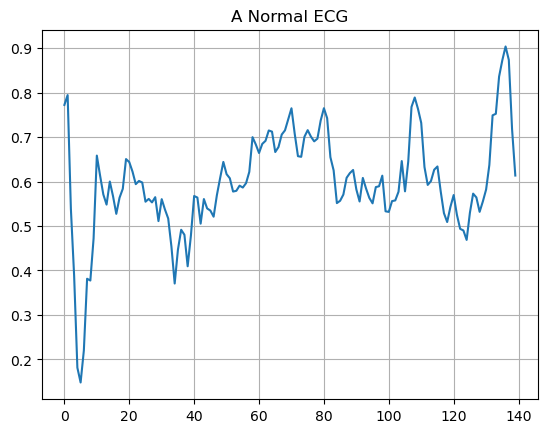

In [13]:
plt.grid()
plt.plot(np.arange(140),np.array(x_train_normal[:1]).flatten())
plt.title("A Normal ECG")
plt.show()

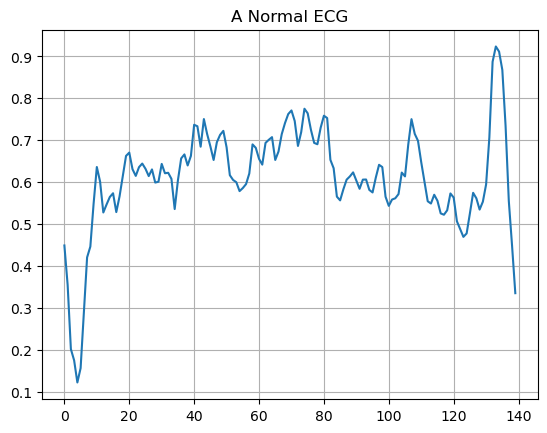

In [14]:
plt.grid()
plt.plot(np.arange(140),np.array(x_train_normal[1:2]).flatten())
plt.title("A Normal ECG")
plt.show()

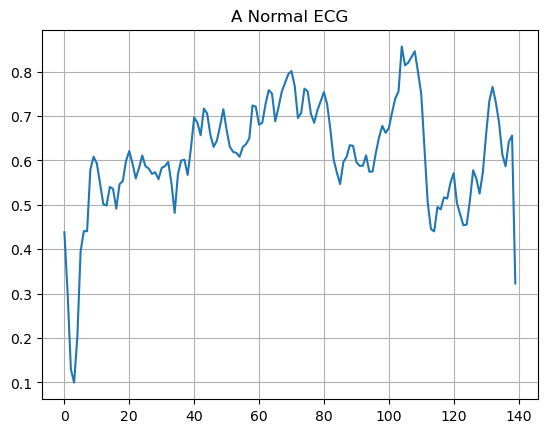

In [15]:
plt.grid()
plt.plot(np.arange(140),np.array(x_train_normal[2:3]).flatten())
plt.title("A Normal ECG")
plt.show()

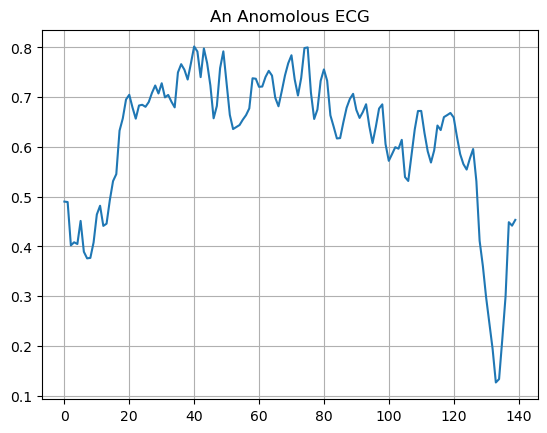

In [16]:
plt.grid()
plt.plot(np.arange(140),np.array(x_train_abnormal[2:3]).flatten())
plt.title("An Anomolous ECG")
plt.show()

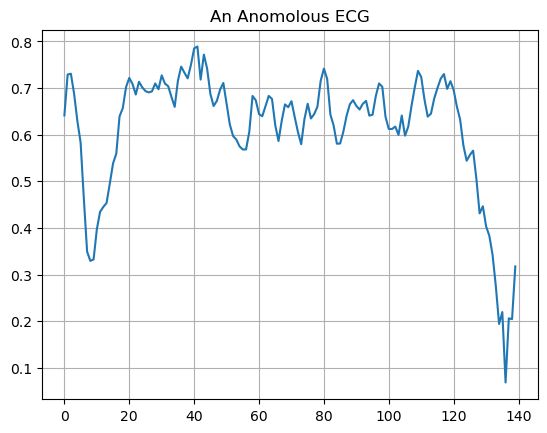

In [17]:
plt.grid()
plt.plot(np.arange(140),np.array(x_train_abnormal[33:34]).flatten())
plt.title("An Anomolous ECG")
plt.show()

In [18]:
# Building the class for autoencoder

class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [19]:
# Compiling the model

autoencoder.compile(optimizer='adam', loss='mae')

In [20]:
# Training the model
trained = autoencoder.fit(x_train_normal, x_train_normal,
          epochs=50,
          batch_size=x_train_normal.shape[0],
          validation_data=(x_test, x_test),
          shuffle=True)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.1391 - val_loss: 0.1458
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.1385 - val_loss: 0.1450
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 0.1378 - val_loss: 0.1442
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 0.1370 - val_loss: 0.1432
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 0.1360 - val_loss: 0.1420
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.1346 - val_loss: 0.1407
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 0.1331 - val_loss: 0.1393
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 0.1316 - val_loss: 0.1377
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 0.1299 - val_loss: 0.1360
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 0.1282 - val_loss: 0.1342
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 0.1262 - val_loss: 0.1322
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.1242 - val_loss:

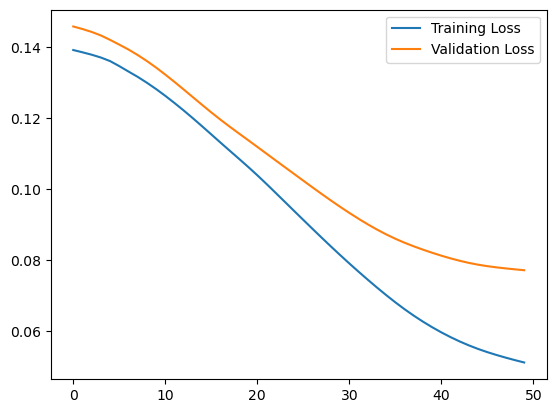

In [21]:
plt.plot(trained.history["loss"], label="Training Loss")
plt.plot(trained.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


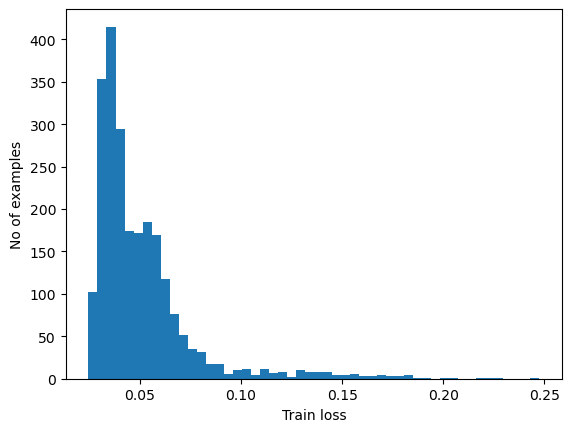

In [22]:
reconstructions = autoencoder.predict(x_train_normal)
train_loss = tf.keras.losses.mae(reconstructions, x_train_normal)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [23]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.07655888503740926


In [24]:
y_test_index = y_test.astype(bool)
y_test_index

2617     True
3204    False
1561     True
549      True
1408     True
        ...  
4660    False
2729     True
447     False
970      True
125      True
Name: 140, Length: 1000, dtype: bool

In [25]:
x_test_normal = x_test[y_test_index]
x_test_normal

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
2617,0.453010,0.344258,0.097557,0.133721,0.230492,0.402841,0.449133,0.446311,0.555084,0.595516,...,0.712708,0.691152,0.745203,0.729526,0.702791,0.676728,0.727013,0.770328,0.658704,0.379948
1561,0.499528,0.538887,0.383933,0.313079,0.241627,0.171261,0.173173,0.296097,0.419140,0.445885,...,0.579540,0.655247,0.809809,0.806299,0.698934,0.570690,0.432159,0.389517,0.382154,0.313607
549,0.526716,0.540651,0.372134,0.329552,0.237237,0.203957,0.174884,0.240136,0.411993,0.477001,...,0.857498,0.803717,0.734998,0.597474,0.473616,0.410957,0.396610,0.498482,0.525550,0.374588
1408,0.581641,0.445044,0.206061,0.149576,0.180298,0.338194,0.403122,0.393301,0.499709,0.613067,...,0.641760,0.732524,0.763746,0.727359,0.709432,0.653662,0.648934,0.667569,0.721137,0.495889
2378,0.573455,0.427440,0.198526,0.204812,0.202240,0.241815,0.293280,0.418779,0.453747,0.507133,...,0.720991,0.754729,0.784034,0.746646,0.694608,0.647644,0.686902,0.703090,0.523297,0.229145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,0.719515,0.716949,0.410571,0.306471,0.121492,0.066407,0.176568,0.389034,0.448748,0.535616,...,0.430323,0.540128,0.677601,0.684681,0.744566,0.688450,0.640718,0.584484,0.480182,0.420135
1090,0.390224,0.303215,0.139426,0.203697,0.274804,0.406454,0.455215,0.458507,0.511402,0.585653,...,0.727051,0.753180,0.806513,0.826568,0.819021,0.734288,0.698190,0.724736,0.713322,0.465966
2729,0.504040,0.439837,0.220551,0.178982,0.146541,0.198744,0.233546,0.350092,0.415650,0.457820,...,0.699768,0.699714,0.726394,0.693360,0.636556,0.613961,0.644244,0.610128,0.468875,0.247314
970,0.581218,0.425138,0.131435,0.058081,0.110652,0.292788,0.431424,0.492032,0.526017,0.651423,...,0.773933,0.776855,0.776743,0.759096,0.716873,0.651162,0.599392,0.613294,0.618084,0.379950


In [26]:
x_test_abnormal = x_test[~y_test_index]
x_test_abnormal

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
3204,0.683938,0.742594,0.671877,0.663312,0.516040,0.465550,0.358754,0.259110,0.217324,0.243437,...,0.313072,0.265762,0.228918,0.140047,0.126658,0.235030,0.316589,0.466039,0.504085,0.453629
370,0.601990,0.671269,0.596553,0.609827,0.562612,0.560933,0.474715,0.450104,0.498133,0.543919,...,0.667453,0.605420,0.585093,0.563655,0.486500,0.364099,0.250495,0.236082,0.226063,0.206007
393,0.446629,0.375589,0.239403,0.287904,0.323077,0.422024,0.477746,0.500058,0.532481,0.567117,...,0.594608,0.596023,0.558312,0.459405,0.361029,0.243182,0.097504,0.180374,0.336558,0.339640
4175,0.534871,0.523805,0.424751,0.388807,0.329280,0.328892,0.260176,0.262378,0.313015,0.392924,...,0.240305,0.211072,0.192334,0.164390,0.248591,0.383256,0.474388,0.603380,0.577795,0.523470
4951,0.272242,0.393431,0.376791,0.498158,0.492244,0.504577,0.418056,0.344740,0.325302,0.327253,...,0.748703,0.704550,0.732793,0.725759,0.716332,0.699725,0.643355,0.564054,0.427928,0.292212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,0.568953,0.585819,0.492084,0.469321,0.414578,0.396887,0.295742,0.250034,0.256817,0.319268,...,0.834011,0.833814,0.859847,0.821953,0.799505,0.788371,0.796849,0.822277,0.706266,0.538585
3702,0.614791,0.621624,0.497109,0.454206,0.387672,0.381851,0.319572,0.304079,0.308602,0.358090,...,0.352010,0.293739,0.274023,0.188950,0.133529,0.163816,0.201355,0.369597,0.425743,0.463121
4712,0.531485,0.500022,0.343422,0.343404,0.331396,0.341107,0.314749,0.322731,0.394996,0.478310,...,0.404079,0.331572,0.292825,0.169736,0.079670,0.180655,0.249053,0.456139,0.496434,0.451721
4660,0.676306,0.763586,0.761932,0.771748,0.665345,0.656074,0.578305,0.495345,0.440048,0.431314,...,0.342853,0.306052,0.299738,0.229674,0.171307,0.182767,0.059889,0.163412,0.189827,0.294927


In [27]:


# plt.plot(x_test_normal[0:1], 'b')
# plt.plot(decoded_data[0], 'r')
# plt.fill_between(np.arange(140), decoded_data[0], x_test_normal[0:1], color='lightcoral')
# plt.legend(labels=["Input", "Reconstruction", "Error"])
# plt.show()


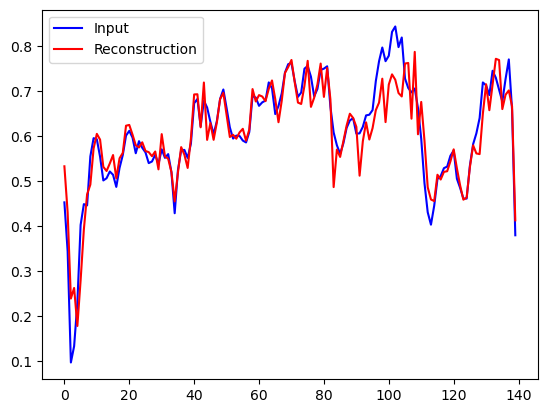

In [28]:
# Plotting the errors between normal data

encoded_data = autoencoder.encoder(x_test_normal).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(np.array(x_test_normal[0:1]).flatten(),'b')
plt.plot(decoded_data[0],'r')
plt.legend(labels=['Input','Reconstruction'])
plt.show()

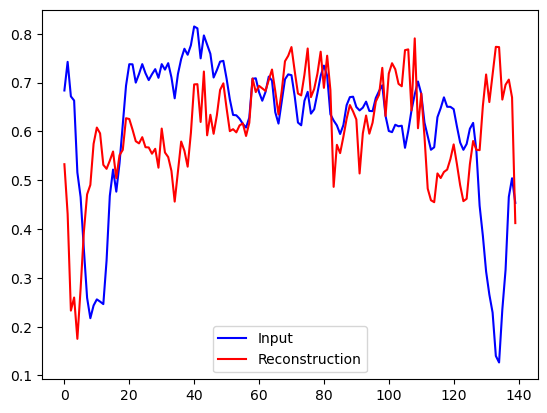

In [29]:
# Plotting the errors between abnormal datas

encoded_data = autoencoder.encoder(x_test_abnormal).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(np.array(x_test_abnormal[0:1]).flatten(),'b')
plt.plot(decoded_data[0],'r')
plt.legend(labels=['Input','Reconstruction'])
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


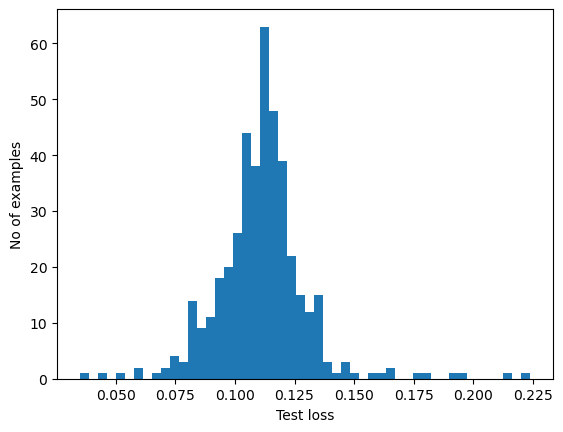

In [30]:
reconstructions = autoencoder.predict(x_test_abnormal)
test_loss = tf.keras.losses.mae(reconstructions, x_test_abnormal)

plt.hist(test_loss, bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

## Autoencoder-2


In [31]:
# Building another model using different batch size to check whether any change in loss
autoencoder1 = AnomalyDetector()
autoencoder1.compile(optimizer='adam',loss='mae')
training1 = autoencoder1.fit(x_train_normal,x_train_normal,
                            epochs=50,
                            batch_size=512,
                            validation_data=(x_test,x_test))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 0.1373 - val_loss: 0.1414
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1325 - val_loss: 0.1349
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1246 - val_loss: 0.1254
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1141 - val_loss: 0.1137
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1020 - val_loss: 0.1039
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0915 - val_loss: 0.0957
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0809 - val_loss: 0.0890
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0714 - val_loss: 0.0839
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0640 - val_loss: 0.0808
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0581 - val_loss: 0.0787
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0544 - val_loss: 0.0767
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0498 - val_loss: 0.0751


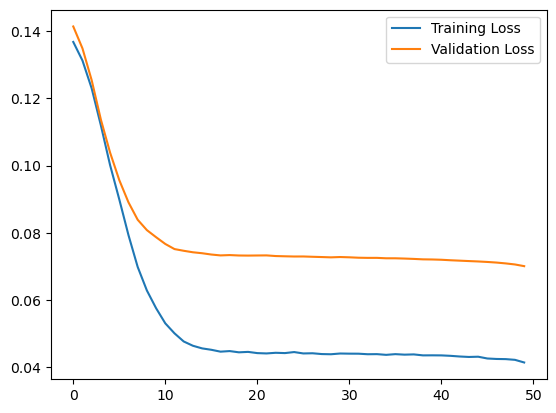

In [32]:
plt.plot(training1.history['loss'],label='Training Loss')
plt.plot(training1.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


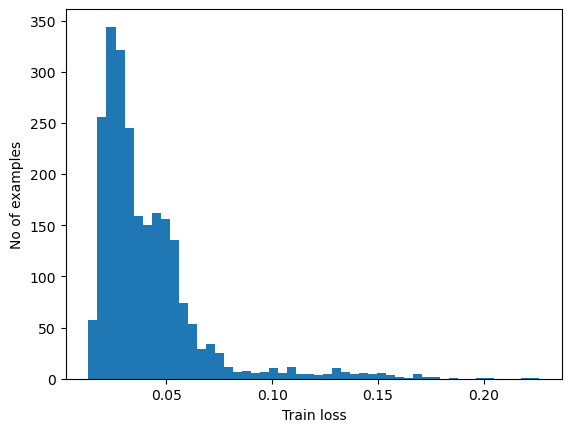

In [33]:
reconstructions = autoencoder1.predict(x_train_normal)
train_loss = tf.keras.losses.mae(reconstructions, x_train_normal)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [34]:
train_loss

<tf.Tensor: shape=(2346,), dtype=float64, numpy=
array([0.05606566, 0.04729848, 0.02740513, ..., 0.04500379, 0.05093203,
       0.03278953])>

In [35]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.06704442760506976


In [36]:
lower_threshold = np.mean(train_loss) - np.std(train_loss)
print("Lower Threshold: ", lower_threshold)

Lower Threshold:  0.015234479284027769


In [37]:
np.mean(train_loss)

0.041139453444548765

In [38]:
np.std(train_loss)

0.025904974160520997

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


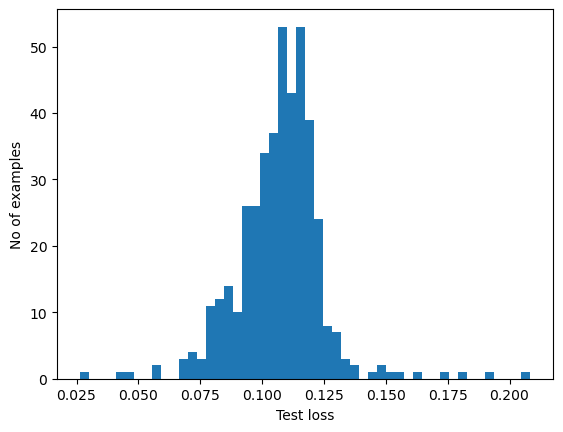

In [39]:
reconstructions = autoencoder1.predict(x_test_abnormal)
test_loss = tf.keras.losses.mae(reconstructions, x_test_abnormal)

plt.hist(test_loss, bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [40]:
np.mean(test_loss)

0.10701181272848195

In [41]:
np.array(x_test_normal.iloc[10,:])

array([0.58722968, 0.4790811 , 0.18182933, 0.11562645, 0.13915362,
       0.22410171, 0.30535497, 0.46111052, 0.5003294 , 0.55605622,
       0.62850856, 0.59027561, 0.54311575, 0.52260497, 0.56405721,
       0.56229393, 0.50770532, 0.56183535, 0.58160311, 0.62478779,
       0.63056063, 0.61894076, 0.58076771, 0.61103988, 0.59208421,
       0.56658013, 0.56936309, 0.57942353, 0.56712351, 0.55419336,
       0.58956334, 0.5565044 , 0.56730405, 0.5319548 , 0.47932603,
       0.52555113, 0.57513598, 0.57286399, 0.53527301, 0.58564045,
       0.65090739, 0.65517297, 0.6264202 , 0.69041748, 0.66042696,
       0.62265503, 0.57475759, 0.6201452 , 0.65337237, 0.67806578,
       0.65652933, 0.61107769, 0.57692252, 0.56869299, 0.56549758,
       0.5597856 , 0.57171551, 0.59882063, 0.68528143, 0.68807532,
       0.66416539, 0.65673399, 0.67093716, 0.68835221, 0.69465522,
       0.63736052, 0.63464979, 0.68887688, 0.70935127, 0.71638747,
       0.73637753, 0.71949917, 0.65057524, 0.66569753, 0.71648

In [42]:
input_data = np.array(x_test_normal.iloc[10,:]).reshape(1,140)
reconstruction = autoencoder1.predict(input_data)
# reconstruction
threshold = 0.05
sample_loss = tf.keras.losses.mae(reconstruction,input_data)[0]

if sample_loss >= threshold:
    print(f"Sample loss is {sample_loss}. So it is an Anomolous Sample")
else:
    print(f"Sample loss is {sample_loss}. So it is an Normal Sample")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Sample loss is 0.02079820397133693. So it is an Normal Sample


### Validating the model on the entire dataset

In [85]:
x_norm_df

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,0.565751,0.403325,0.174330,0.139541,0.132887,0.267145,0.391046,0.407650,0.490147,0.606675,...,0.596026,0.691213,0.740816,0.715777,0.685498,0.636101,0.614525,0.619195,0.660354,0.465778
1,0.481247,0.292669,0.108637,0.117948,0.179900,0.301794,0.483556,0.542721,0.576304,0.692721,...,0.653721,0.655837,0.703491,0.714505,0.704886,0.671159,0.644389,0.690859,0.679208,0.345032
2,0.526886,0.425440,0.161455,0.107276,0.157957,0.313732,0.456971,0.461223,0.501778,0.620457,...,0.758226,0.704301,0.686569,0.650536,0.605436,0.521837,0.523069,0.640975,0.658310,0.420208
3,0.617307,0.489682,0.194544,0.143799,0.147247,0.208664,0.268977,0.431713,0.475662,0.525872,...,0.643746,0.629697,0.682206,0.689361,0.720620,0.717773,0.706196,0.725345,0.706704,0.423042
4,0.643792,0.588088,0.352583,0.191373,0.137914,0.219995,0.337955,0.413351,0.430386,0.561036,...,0.712325,0.740932,0.744174,0.750988,0.791226,0.756039,0.702608,0.712587,0.727213,0.556803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.627404,0.639043,0.531436,0.492781,0.365502,0.341724,0.278207,0.269228,0.344256,0.443733,...,0.791245,0.825789,0.924077,0.972081,0.935186,0.843082,0.792113,0.791648,0.728687,0.550963
4994,0.399208,0.400211,0.221657,0.222293,0.247537,0.334599,0.383010,0.444444,0.520597,0.524148,...,0.734990,0.774392,0.895443,0.935641,0.896253,0.819834,0.771712,0.792560,0.714545,0.529099
4995,0.479358,0.457656,0.290622,0.276005,0.293493,0.387617,0.468816,0.551976,0.556795,0.578887,...,0.602546,0.514955,0.438116,0.336021,0.178907,0.114486,0.104745,0.288905,0.375722,0.317459
4996,0.528543,0.492034,0.294195,0.262332,0.192293,0.196437,0.193909,0.264248,0.386036,0.458220,...,0.748613,0.756199,0.872218,0.915153,0.861025,0.774895,0.730652,0.744576,0.682199,0.511115


In [86]:
ecg_reconstruction = autoencoder1.predict(x_norm_df)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step


In [87]:
loss = tf.keras.losses.mae(ecg_reconstruction,x_norm_df)

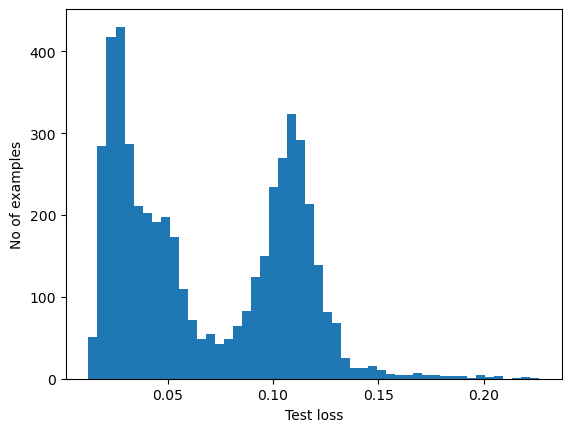

In [88]:
plt.hist(loss, bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [89]:
y_pred = []
for i in loss:
    if i>0.05:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [91]:
type(y)

pandas.core.series.Series

In [93]:
y_preds = pd.Series(y_pred)

In [95]:
y_preds.value_counts()

0    2766
1    2232
Name: count, dtype: int64

In [97]:
y = y.astype(int)
y.value_counts()

140
1    2919
0    2079
Name: count, dtype: int64

In [108]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay

In [117]:
cm = confusion_matrix(y,y_preds,labels=[0,1])

In [118]:
acc = accuracy_score(y,y_preds)
acc

0.8601440576230492

In [119]:
precision_score(y,y_preds)

0.9973118279569892

In [120]:
recall_score(y,y_preds)

0.762589928057554

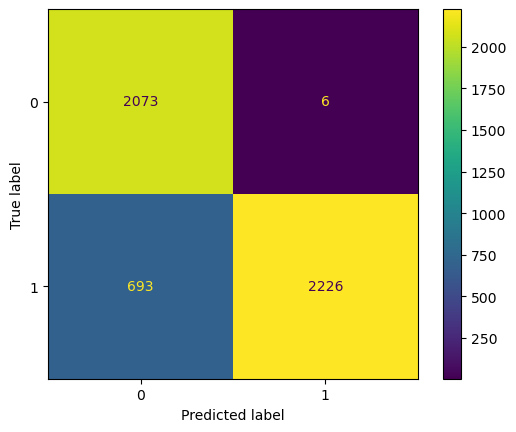

In [114]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()